Import libraries

In [1]:
import sys
import os
import pandas as pd 

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from scripts.clustering.clustering import ClusteringComparator, FeatureSelector

In [2]:
df_original = pd.read_csv('C:/Users/jaret/OneDrive/Documents/UFG/TCC/ENEM - final/data/MICRODADOS_RJ_clean_2023.csv')
df_reduced = pd.read_csv('C:/Users/jaret/OneDrive/Documents/UFG/TCC/ENEM - final/data/MICRODADOS_RJ_rd_2023.csv')

Initiation of class and data preparation

In [3]:
k_to_test = range(2,9)

evaluator = ClusteringComparator(
    X_original=df_original, 
    X_reduced=df_reduced, 
    k_range=k_to_test, 
    linkage='ward', 
    covariance_type='full', 
    random_state=42, 
    n_jobs=-1, 
    cache_dir='__joblib_cache__'
)

evaluator.stratified_sample(strata_col='CO_MUNICIPIO_PROVA', sample_frac=0.005)

evaluator.scale_features(scale_original_numeric=True, scale_reduced=False)

--- ClusteringComparator Initialized ---
Performing stratified sampling on 'CO_MUNICIPIO_PROVA' with a 0.50% fraction...
Sampling complete. Active datasets reduced to 893 rows.
Scaling complete.


c:\Users\jaret\OneDrive\Documents\UFG\TCC\ENEM - final\scripts\clustering\clustering.py:168: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_indices = self._master_original_df.groupby(strata_col, group_keys=False).apply(


In [4]:
evaluator.run_and_evaluate(
    algorithms=['kmeans', 'hierarchical', 'gmm', 'kprototypes'], 
    cross_sample_numeric=3, 
    cross_sample_kproto=3
)

--- Running Cross-Sample Evaluation for Numeric Models (3 iterations) ---
  Iteration 1/3...
  Iteration 2/3...
  Iteration 3/3...
--- Running Cross-Sample Evaluation for K-Prototypes (3 iterations) ---
  Iteration 1/3...
  Iteration 2/3...
  Iteration 3/3...

✅ Evaluation complete.



--- Plotting Evaluation Metrics ---


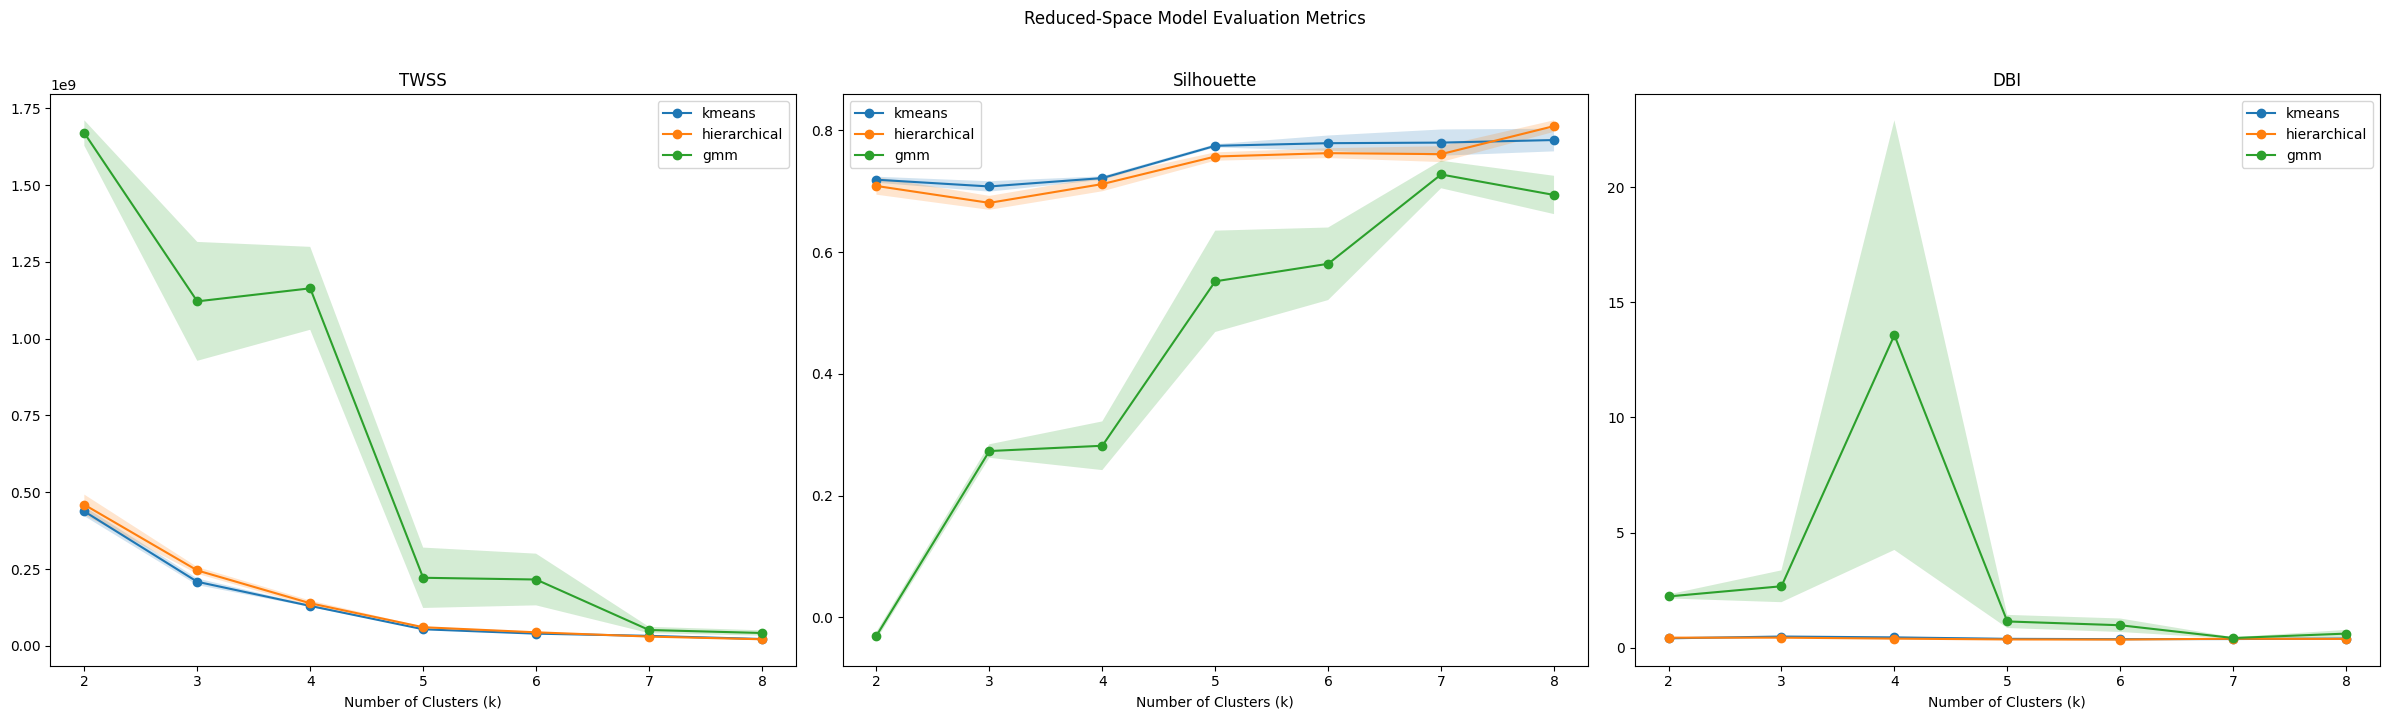

In [5]:
evaluator.plot_evaluation_metrics()